In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train= pd.read_csv("train_eda.csv")
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    int64  
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     891 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 90.6+ KB


In [48]:
titanic= train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]

In [49]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000
887,1,1,female,19,0,0,30.0000
888,0,3,female,26,1,2,23.4500
889,1,1,male,26,0,0,30.0000


In [50]:
# before beggining i want to male female be 1, 0.
titanic= titanic.replace({"male":1, "female":0})

In [51]:
X= titanic.drop("Survived", axis=1)
y= titanic.Survived

## PCA?

In [52]:
#Importamos las Librerías

#LIBRERÍAS BASICAS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#PCA
from sklearn.decomposition import PCA

#SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split , cross_val_score

#KNN
from sklearn.neighbors import KNeighborsClassifier

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

#HYPERTUNNING
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

#METRICAS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [53]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

principalDf.tail()

print('Variacion explicada por los componentes principales: {}'.format(pca.explained_variance_ratio_))




Variacion explicada por los componentes principales: [0.920162   0.07894876]


In [54]:
principalDf

,principal component 1,principal component 2
0,-25.166165,-7.165805
1,39.300284,7.083307
2,-24.383019,-3.172917
3,21.042270,4.586736
4,-24.011877,5.820131
...,...,...
886,-19.275155,-2.296862
887,-2.491943,-10.748705
888,-8.854323,-3.638075
889,-2.300845,-3.750860


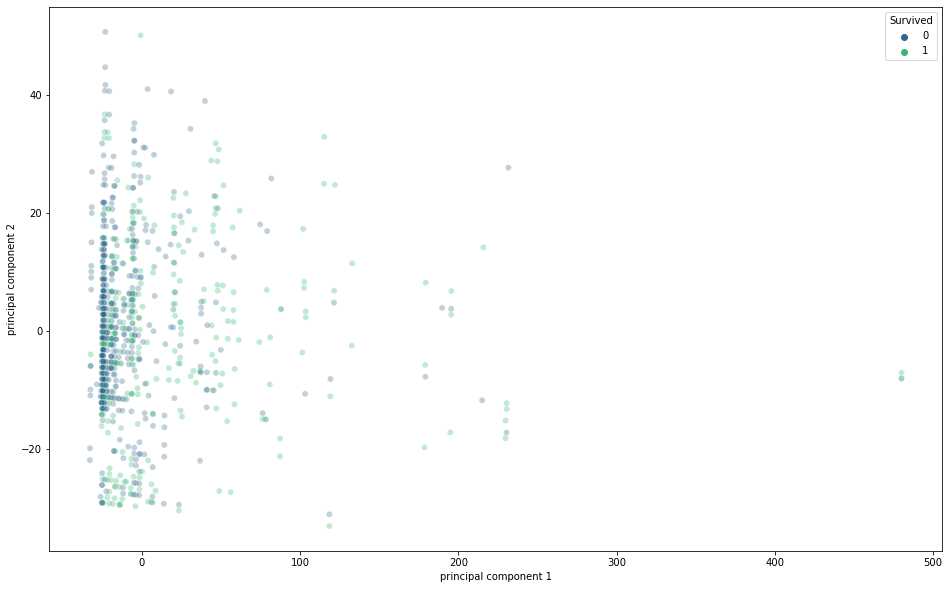

In [55]:
#concatenamos el data frame con la columna popularity cat
finalDF = pd.concat([principalDf, train[['Survived']]], axis = 1)
finalDF


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="Survived",
    palette=sns.color_palette("viridis", 2), #cambiamos de paleta para poder visualizar mejor
    data=finalDF,
    legend="full",
    alpha=0.3
)
plt.show()





In [56]:
### 8.2 Analisis con 3 componentes

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
result = pd.DataFrame(data = principalComponents
             , columns=['PCA%i' % i for i in range(3)])

result.head()

print('Variacion explicada por los componentes principales: {}'.format(pca.explained_variance_ratio_))

Variacion explicada por los componentes principales: [9.20162000e-01 7.89487588e-02 4.78633891e-04]


In [57]:
X= titanic.drop("Survived", axis=1)
y= titanic.Survived

In [58]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22,1,0,7.2500
1,1,0,38,1,0,71.2833
2,3,0,26,0,0,7.9250
3,1,0,35,1,0,53.1000
4,3,1,35,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000
887,1,0,19,0,0,30.0000
888,3,0,26,1,2,23.4500
889,1,1,26,0,0,30.0000


In [59]:
# Time to split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=123)

### Let's look one detail first: if the target variable is balanced

In [60]:
titanic.groupby(by= "Survived").size()

Survived
0    549
1    342
dtype: int64

In [61]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot


In [63]:
# it is not full balanced. So stratify must be done whenever we apply some algorithms.

# Estrategia de SobreMuestreo
sm = SMOTE(random_state = 123)

# ajuste y transformacion
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)





In [65]:
X_train = pd.DataFrame(X_train_SMOTE, columns=X_train_SMOTE.columns)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,2,0,34,1,1,32.5000
1,2,0,31,1,1,26.2500
2,1,1,36,0,0,26.2875
3,3,1,29,0,0,7.8958
4,2,1,18,0,0,11.5000


In [66]:
#armamos el data frame para la data balanceada
data = X_train.join(y_train_SMOTE)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,2,0,34,1,1,32.5000,1
1,2,0,31,1,1,26.2500,1
2,1,1,36,0,0,26.2875,1
3,3,1,29,0,0,7.8958,1
4,2,1,18,0,0,11.5000,0


In [67]:
data["Survived"].value_counts()

0    379
1    379
Name: Survived, dtype: int64

In [68]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,2,0,34,1,1,32.500000,1
1,2,0,31,1,1,26.250000,1
2,1,1,36,0,0,26.287500,1
3,3,1,29,0,0,7.895800,1
4,2,1,18,0,0,11.500000,0
...,...,...,...,...,...,...,...
753,3,1,30,0,0,56.495800,1
754,3,0,16,2,1,7.853159,1
755,1,0,40,0,0,131.730399,1
756,3,1,30,0,0,7.976196,1


In [69]:
X= data.drop("Survived", axis=1)
y= data.Survived

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=123)

## 1. Decision Tree

In [118]:
range= np.arange(1,6)
scores= []
for i in range:
    tree= DecisionTreeClassifier(max_depth=i, random_state=123)
    tree.fit(X_train, y_train)
    y_train_pred= tree.predict(X_train)
    y_test_pred= tree.predict(X_test)
    scores.append(accuracy_score(y_test, y_test_pred))
print(scores)

[0.7763157894736842, 0.7763157894736842, 0.7850877192982456, 0.7982456140350878, 0.7850877192982456]


In [71]:
tree= DecisionTreeClassifier(max_depth=3, random_state=123)

In [72]:
# .fit
tree.fit(X_train, y_train)

# .predict
y_train_pred= tree.predict(X_train)
y_test_pred= tree.predict(X_test)


In [73]:
print("% de accuracy para el train", accuracy_score(y_train, y_train_pred))
print("% de accuracy para test",  accuracy_score(y_test, y_test_pred))

% de accuracy para el train 0.8433962264150944
% de accuracy para test 0.7850877192982456


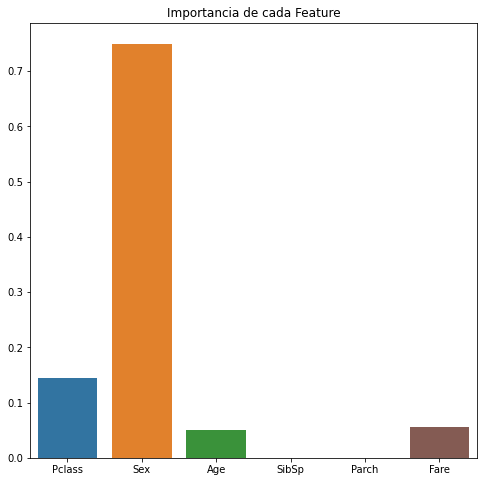

In [74]:
import seaborn as sns

plt.figure(figsize=(8,8))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

% de accuracy para el train 0.8566037735849057
% de accuracy para test 0.7982456140350878


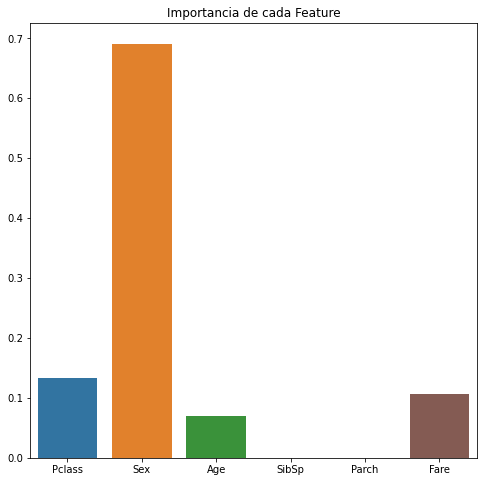

In [75]:
# Lets try with other depth
tree= DecisionTreeClassifier(max_depth=4, random_state=123)

# .fit
tree.fit(X_train, y_train)

# .predict
y_train_pred= tree.predict(X_train)
y_test_pred= tree.predict(X_test)


print("% de accuracy para el train", accuracy_score(y_train, y_train_pred))
print("% de accuracy para test",  accuracy_score(y_test, y_test_pred))

import seaborn as sns

plt.figure(figsize=(8,8))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

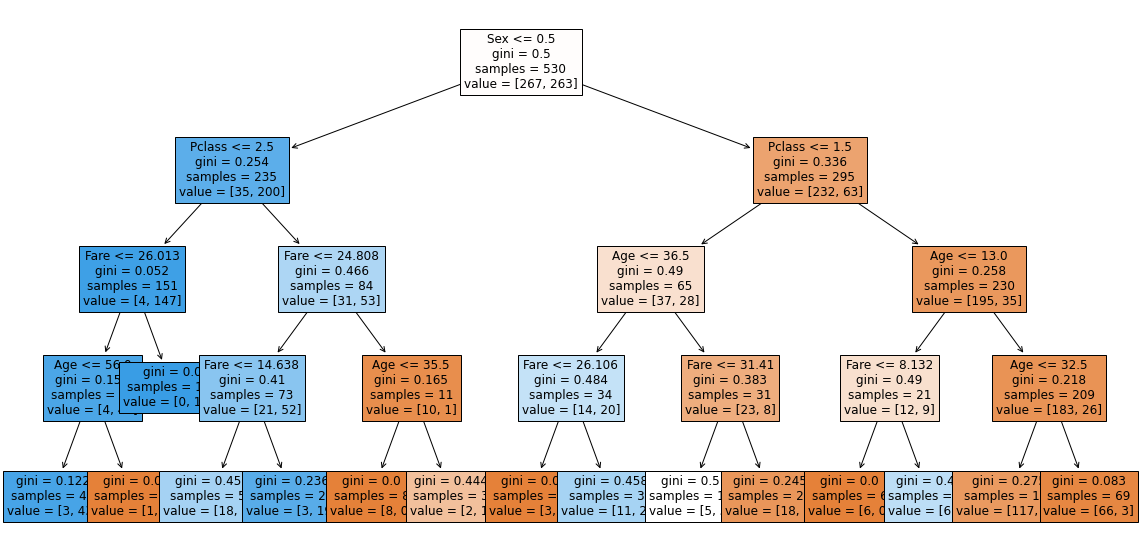

In [76]:
# let´s plot with max_depth= 4
from sklearn.tree import plot_tree
ax, fig= plt.subplots(figsize=(20,10))
fig= plot_tree(decision_tree= tree, feature_names= X_train.columns, filled= True, fontsize= 12)

[[86 26]
 [20 96]]


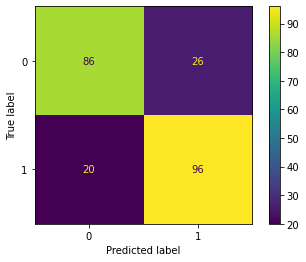

In [77]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

In [78]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test,y_test_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

Accuracy of the classifier is: 0.7982456140350878
Precision Score of the classifier is: 0.7868852459016393
Recall Score of the classifier is: 0.8275862068965517
F1 Score of the classifier is: 0.8067226890756303


AUC for our classifier is: 0.8537946428571428


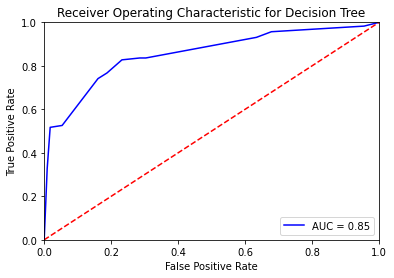

In [79]:
#CURVA - ROC
# 1)
class_probabilities = tree.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
?accuracy_score

Definimos entonces que para cada algoritmo vamos a hacer predictions. Vamos a calcular la accuracy (y todas las metricas), y vamos a ver la confusion matrix y vamos a graficar curva AUC-ROC.

## Random Forrest

In [119]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, random_state=123)

In [82]:
?RandomForestClassifier

In [120]:
range= np.arange(50,201,50) # create 50,100,150 and 200 iterations.
scores= []
for i in range:
    rf= RandomForestClassifier(n_estimators=i, random_state=123, max_depth=3)
    rf.fit(X_train, y_train)
    y_train_pred= rf.predict(X_train)
    y_test_pred= rf.predict(X_test)
    scores.append(accuracy_score(y_test, y_test_pred))
print(scores)

[0.8105263157894737, 0.8210526315789474, 0.8157894736842105, 0.8210526315789474]


In [121]:
range= np.arange(50,201,50) # create 50,100,150 and 200 iterations.
scores= []
for i in range:
    rf= RandomForestClassifier(n_estimators=i, random_state=123, max_depth=4)
    rf.fit(X_train, y_train)
    y_train_pred= rf.predict(X_train)
    y_test_pred= rf.predict(X_test)
    scores.append(accuracy_score(y_test, y_test_pred))
print(scores)

[0.8263157894736842, 0.8263157894736842, 0.8263157894736842, 0.8263157894736842]


In [123]:
rf= RandomForestClassifier(n_estimators=100, random_state=123, max_depth=3)

In [124]:
rf.fit(X_train, y_train)

y_train_pred= rf.predict(X_train)
y_test_pred= rf.predict(X_test)

In [125]:
print("% de accuracy para el train", accuracy_score(y_train, y_train_pred))
print("% de accuracy para test",  accuracy_score(y_test, y_test_pred))

% de accuracy para el train 0.823943661971831
% de accuracy para test 0.8210526315789474


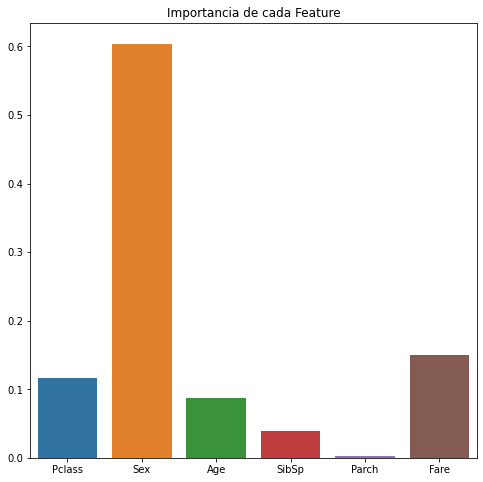

In [126]:
plt.figure(figsize=(8,8))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

# Sex tiene demasiada importancia...

[[84 11]
 [23 72]]


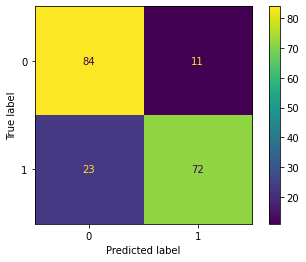

In [127]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

In [128]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test,y_test_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")



Accuracy of the classifier is: 0.8210526315789474
Precision Score of the classifier is: 0.8674698795180723
Recall Score of the classifier is: 0.7578947368421053
F1 Score of the classifier is: 0.8089887640449439


AUC for our classifier is: 0.8885318559556787


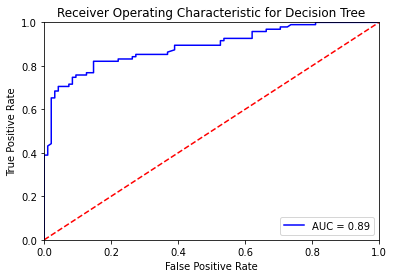

In [129]:
#CURVA - ROC
# 2)
class_probabilities = rf.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression

In [97]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y, random_state=123)

In [98]:
?LogisticRegression

In [99]:
logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_train_pred= logreg.predict(X_train)
y_test_pred= logreg.predict(X_test)

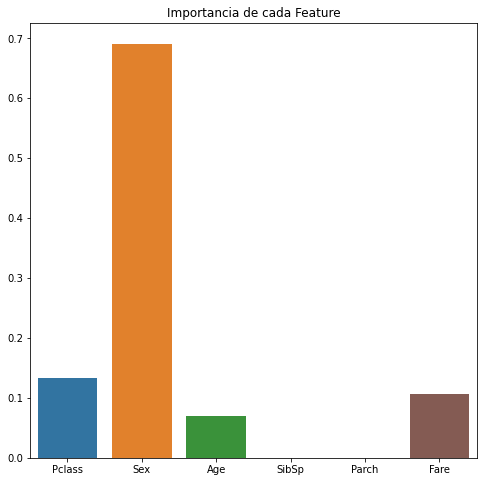

In [100]:
plt.figure(figsize=(8,8))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

[[79 16]
 [21 74]]


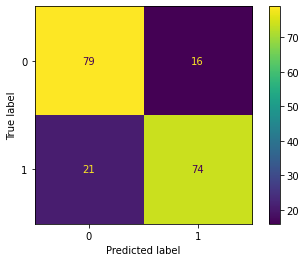

In [101]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

The "bad predictions" are 16+21= 37 observations where the prediction was missed. 

In [102]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test,y_test_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")


Accuracy of the classifier is: 0.8052631578947368
Precision Score of the classifier is: 0.8222222222222222
Recall Score of the classifier is: 0.7789473684210526
F1 Score of the classifier is: 0.7999999999999999


AUC for our classifier is: 0.8849861495844875


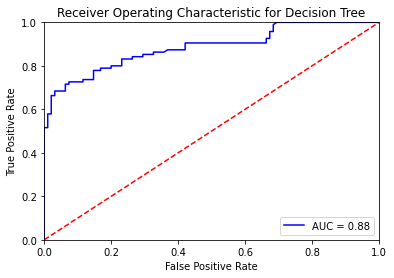

In [103]:
#CURVA - ROC
# 3)
class_probabilities = logreg.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KNN

In [104]:
X= titanic.drop("Survived", axis=1)
y= titanic.Survived

In [105]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=123)

In [106]:
range= np.arange(1,20)
scores= []
for i in range:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_train_pred= knn.predict(X_train)
    y_test_pred= knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_test_pred))
print(scores)
    

[0.6865671641791045, 0.6865671641791045, 0.7052238805970149, 0.6940298507462687, 0.667910447761194, 0.6753731343283582, 0.6828358208955224, 0.6865671641791045, 0.7014925373134329, 0.7014925373134329, 0.6791044776119403, 0.6902985074626866, 0.6828358208955224, 0.7014925373134329, 0.6828358208955224, 0.6902985074626866, 0.6940298507462687, 0.7089552238805971, 0.7126865671641791]


In [107]:
X= data.drop("Survived", axis=1)
y= data.Survived
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=123)

In [108]:
range= np.arange(1,20)
scores= []
for i in range:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_train_pred= knn.predict(X_train)
    y_test_pred= knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_test_pred))
print(scores)

[0.7543859649122807, 0.6798245614035088, 0.7368421052631579, 0.6929824561403509, 0.7412280701754386, 0.6798245614035088, 0.6710526315789473, 0.6798245614035088, 0.6710526315789473, 0.6491228070175439, 0.6622807017543859, 0.6754385964912281, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6535087719298246, 0.6710526315789473, 0.6535087719298246, 0.6535087719298246]


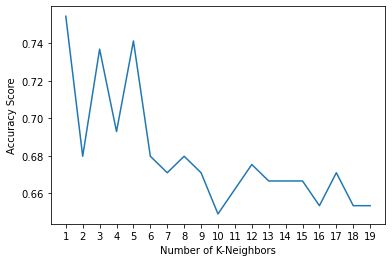

In [112]:
plt.plot(range, scores)
plt.xlabel("Number of K-Neighbors")
plt.ylabel("Accuracy Score")
plt.xticks(ticks=range)
plt.show();

In [113]:
knn= KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_train_pred= knn.predict(X_train)
y_test_pred= knn.predict(X_test)

[[78 34]
 [25 91]]


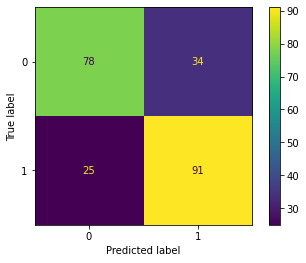

In [115]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [116]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test,y_test_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

Accuracy of the classifier is: 0.7412280701754386
Precision Score of the classifier is: 0.728
Recall Score of the classifier is: 0.7844827586206896
F1 Score of the classifier is: 0.7551867219917011


AUC for our classifier is: 0.7747075123152709


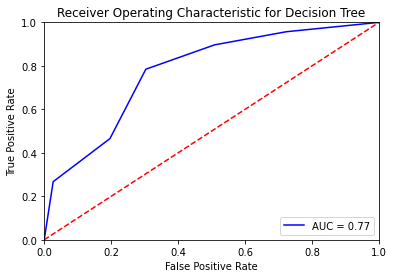

In [117]:
#CURVA - ROC
# 4)
class_probabilities = knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Given all this metrics. The best model is Random Forrest. We tried to avoid overfitting and the accuracy, and AUC was the largest and the amount of FN and FP is the smallest.